# Insurance Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib notebook

# Loading DataFrame

In [4]:
df = pd.read_csv (r'C:\Users\dp\Desktop\_\Coursera\Projects\InsuranceDataAnalysis\insurance.csv')
# pd.set_option("display.max_rows", None, "display.max_columns", None)
df1 = df

df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Visualization

<IPython.core.display.Javascript object>


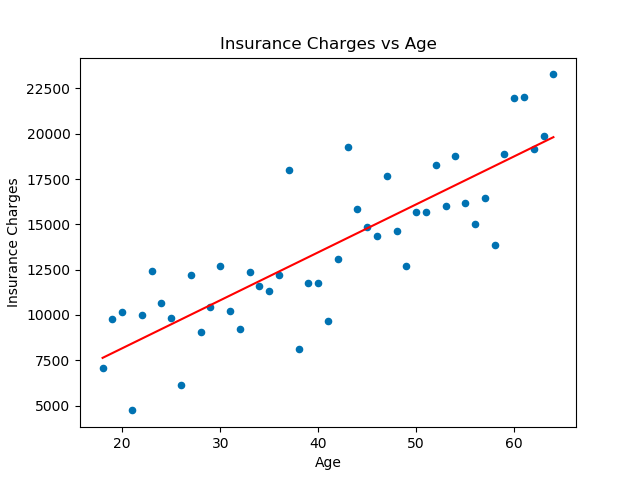

In [3]:
plt.style.use('seaborn-colorblind')
df3 = df1.groupby('age').mean()
df3 = df3.reset_index()

#Plotting a scatter plot for depciting graph between age and insurance charges
age_charges = df3.plot.scatter('age', 'charges')
m,c = np.polyfit(df3['age'],df3['charges'], 1)
plt.plot(df3['age'], m*df3['age'] + c, color = 'red')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges vs Age')

plt.show()

<IPython.core.display.Javascript object>


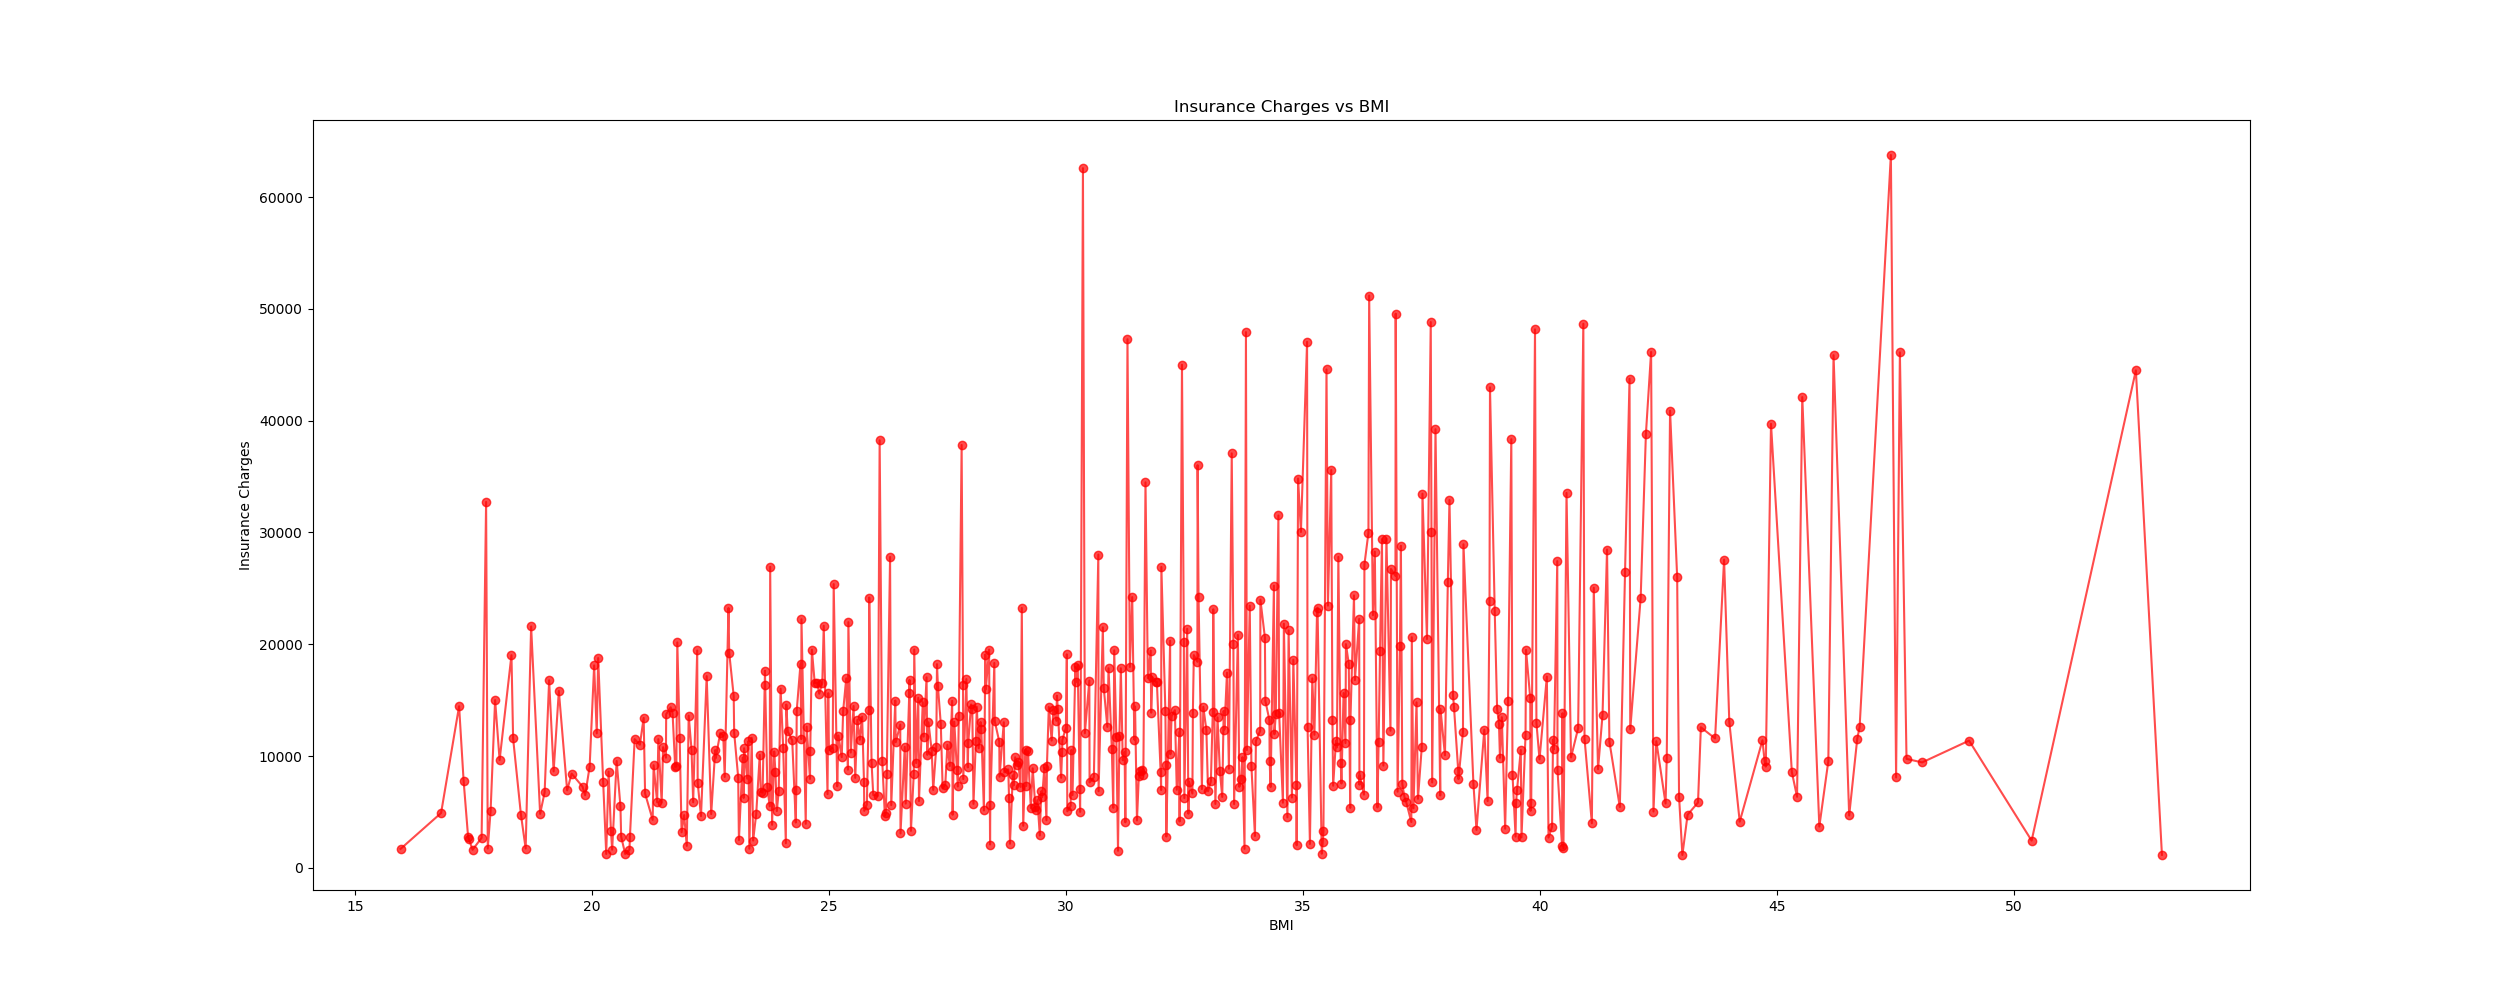

In [124]:
plt.figure(figsize = (25,10))
df4 = df1.groupby('bmi').mean()
df4 = df4.reset_index()

#Plotting a scatter plot for depciting graph between bmi and insurance charges
bmi_charges = plt.plot(df4['bmi'], df4['charges'], color = 'red', alpha = 0.7, marker = 'o')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges vs BMI')
plt.show()


# Regression Techniques

In [68]:
# Importing various Regression tools 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score
from sklearn.model_selection import train_test_split

In [69]:
# Converting feature 'sex' into numeric valued label

df['sex'] = [0 if df['sex'][i] == 'female' else 1 for i in range(len(df['sex']))]
df['smoker'] = [1 if df['smoker'][i] == 'yes' else 0 for i in range(len(df['sex']))]

# We can perform this using Label Encoder as well.

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [78]:
#Splitting our dataset into training and test sets for better abstraction 
x = np.array(df[df.columns[0:5]])
y = np.array(df['charges'])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regression_scores = []

Linear Regression

In [79]:
# Finding r2 score for Linear Regression without Polynomial Features
linreg = LinearRegression().fit(X_train, y_train)
pred = linreg.predict(X_test)

linreg_r2score = r2_score(y_test, pred)
linreg_r2score

0.7952171980481992

Linear Regression with Polynomial Features

In [80]:
# Implementing Polynomial Features with Linear Regression

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train) 
linreg = LinearRegression().fit(X_poly, y_train)
y_train_pred = linreg.predict(X_poly)
X_test_poly = poly.transform(X_test)
y_test_pred = linreg.predict(X_test_poly)


linreg_r2score = r2_score(y_test,y_test_pred)
regression_scores.append(('Linear Regression', linreg_r2score))
linreg_r2score

0.8849197344147238

Lasso Regression with Polynomial Features

In [81]:
# Implementing Polynomial Features with Lasso Regression

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train) 
lasso = Lasso(alpha = 0.001, max_iter = 100000).fit(X_poly, y_train)
y_train_pred = lasso.predict(X_poly)
X_test_poly = poly.transform(X_test)
y_test_pred = lasso.predict(X_test_poly)


lasso_r2score = r2_score(y_test,y_test_pred)
regression_scores.append(('Lasso Regression', lasso_r2score))
lasso_r2score

0.884919782798008

Ridge regression with Polynomial Features

In [82]:
# Implementing Polynomial Features with Ridge Regression

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train) 
ridge = Ridge(alpha = 0.001, max_iter = 400).fit(X_poly, y_train)
y_train_pred = ridge.predict(X_poly)
X_test_poly = poly.transform(X_test)
y_test_pred = ridge.predict(X_test_poly)


ridge_r2score = r2_score(y_test,y_test_pred)
regression_scores.append(('Ridge Regression', ridge_r2score))
ridge_r2score

0.8849192923901553

In [83]:
regression_scores

[('Linear Regression', 0.8849197344147238),
 ('Lasso Regression', 0.884919782798008),
 ('Ridge Regression', 0.8849192923901553)]

Since Lasso Regression with Polynomial Features produces best score, we will use that model.